Generating descriptions of KO abundances


In [1]:
import numpy as np
import pandas as pd
from mgsa.helpers import plot

soils = ['Soil3', 'Soil5', 'Soil9', 'Soil11', 'Soil12', 'Soil14', 'Soil15', 'Soil16', 'Soil17'] 
prefixes = ['T0', 'Soil3', 'Soil5', 'Soil9', 'Soil11', 'Soil12', 'Soil14', 'Soil15', 'Soil16', 'Soil17'] 

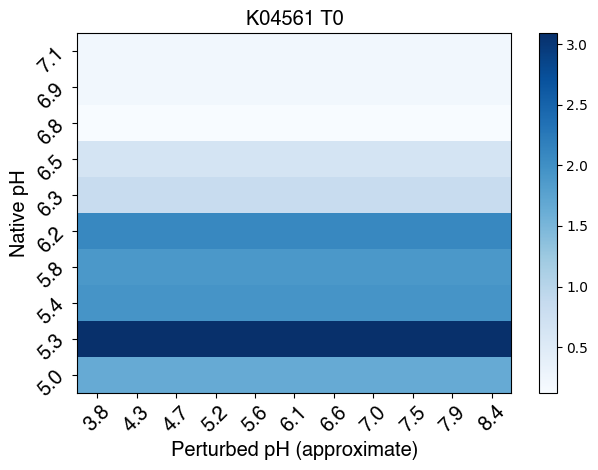

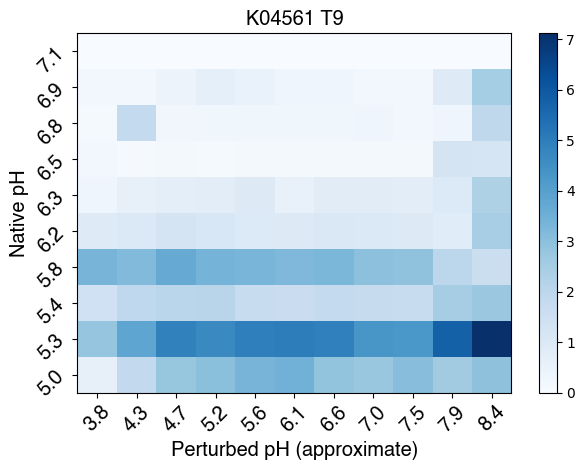

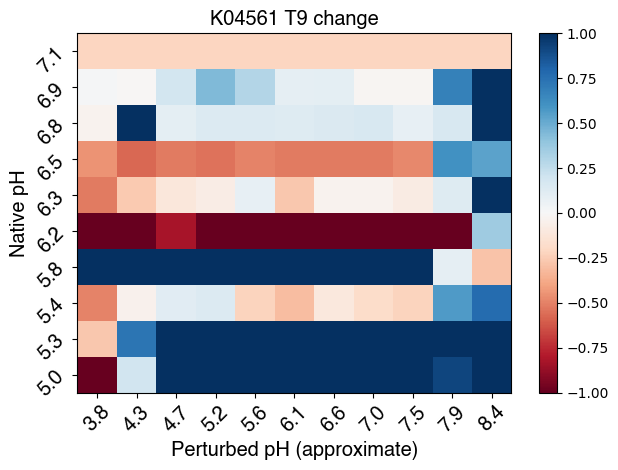

In [ ]:
#given a KO, I want to build a native vs perturbed plot 
#I also want to specify if it is drug or no drug

#K05601 is a good phase III
#also K04561

KO = 'K04561'  #example

T0 = np.zeros((10, 11))
T9 = np.zeros((10, 11))

#collects the abundance, given a filepath, sample id, and KO number 
def get_abundance(file_path, sample_id, ko_number):
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if parts[0] == sample_id and parts[1] == ko_number:
                return float(parts[-1])
    return None

#T0 first
file_path = f'../data/KO_table/T0.KO_absolute_average_depth.tsv'
T0samples = pd.read_csv('../data/T0_sampleIDs.tsv', sep = '\t', header = None)
T0samples = T0samples.values
selected = [2, 4, 5, 8, 10, 11, 13, 14, 15, 16]
j = 0
for i, sample in enumerate(T0samples):
    if i in selected: 
        T0[j] = get_abundance(file_path, sample, KO)
        j += 1
        
        
#Next, T9

def perturbed_pH_sample(sample):
    metadata = pd.read_csv(f'../data/metadata.tsv', sep='\t')
    metadata = metadata.set_index('sample')
    return metadata.loc[sample, 'pH']

def samples(soil):
    sample_IDs = []
    metadata = pd.read_csv('../data/metadata.tsv', sep='\t')
    metadata = metadata.set_index('sample')
    soil_ = soil + '_'
    pHs = []
    for sample in metadata.index:
        if 'None' in sample and 'T9' in sample and soil_ in sample and 'Nitrate' not in sample:
            sample_IDs.append(sample)
            pHs.append(perturbed_pH_sample(sample))  
    #make sure the samples are organized by increaing perturbed pH
    pHs = np.array(pHs)
    sample_IDs = np.array(sample_IDs)
    indices = np.argsort(pHs)
    sample_IDs = sample_IDs[indices]
    sample_IDs = sample_IDs.tolist()
    return sample_IDs

for soil in soils:
    sample_ids = samples(soil)
    file_path = f'../data/KO_table/{soil}.KO_absolute_average_depth.tsv'
    row_idx = soils.index(soil)
    for sample in sample_ids:
        col_idx = sample_ids.index(sample)
        T9[row_idx][col_idx] = get_abundance(file_path, sample, KO)
        
plot(T0, f'{KO} T0')
plot(T9, f'{KO} T9')
plot(T9 - T0, f'{KO} T9 change', cmap = 'RdBu', vmin = -1, vmax = 1)